## Ridge Regresyon Modeli

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"] 
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis= 1).astype("float64")
X = pd.concat([X_, ms[["League_N", "Division_W", "NewLeague_N"]]], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

In [3]:
from sklearn.linear_model import Ridge

In [4]:
ridge_model = Ridge(alpha= 0.7599555414764666).fit(X_train, y_train)

In [5]:
ridge_model

Ridge(alpha=0.7599555414764666, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
ridge_model.coef_

array([ -1.78109993,   8.81780859,   7.27441217,  -3.33111713,
        -2.07427357,   5.42217975,   7.5288397 ,  -0.13605601,
        -0.21669368,  -0.6236789 ,   1.7962255 ,   0.73657218,
        -0.68509255,   0.26157929,   0.26792401,  -0.49165312,
       104.62138682, -98.39238568, -41.13535508])

In [7]:
10**np.linspace(10, -2, 100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

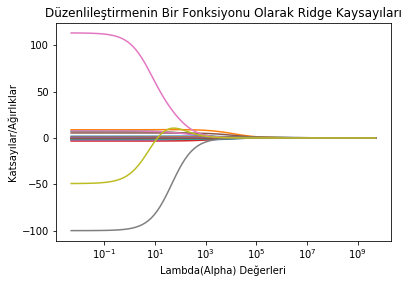

In [30]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    
    ridge_model.set_params(alpha= i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar/Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Kaysayıları");

### TAHMİN

In [9]:
y_pred = ridge_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.05179222828434

### Model Tuning

In [11]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5

In [12]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [13]:
from sklearn.linear_model import RidgeCV

In [14]:
ridge_CV = RidgeCV(alphas= lambdalar, scoring= "neg_mean_squared_error", normalize= True)

In [15]:
ridge_CV.fit(X_train, y_train) 

# Train Seti üzerinden optimum parametrelere erişmeye çalışacağız.

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [16]:
ridge_CV.alpha_

# optimum lambda değeri

0.7599555414764666

In [17]:
ridge_tuned = Ridge(alpha= ridge_CV.alpha_,
                   normalize= True).fit(X_train, y_train)

In [18]:
ridge_tuned

Ridge(alpha=0.7599555414764666, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [22]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415